In [1]:
from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI
import os
import torch

n_part = 1_000_000

## generate gaussian beam distribution (with no z-pz correlation)

In [2]:
# create synthetic ground truth beam from base and transform yaml files
yaml_dir = os.path.join('data', 'yaml_files')
save_dir = os.path.join('data', 'gaussian_beam', 'low_E_spread')
p0c = 43.36e6 # reference momentum in eV/c
gaussian_beam = create_beam(
    base_yaml = os.path.join(yaml_dir, 'gaussian.yaml'),
    transforms_yaml = os.path.join(yaml_dir, 'transforms-linear-no-z-E-corr.yaml'), 
    p0c = p0c,
    n_particle = n_part,
)

# save beam
torch.save(gaussian_beam, "data/gaussian_beam.pt")

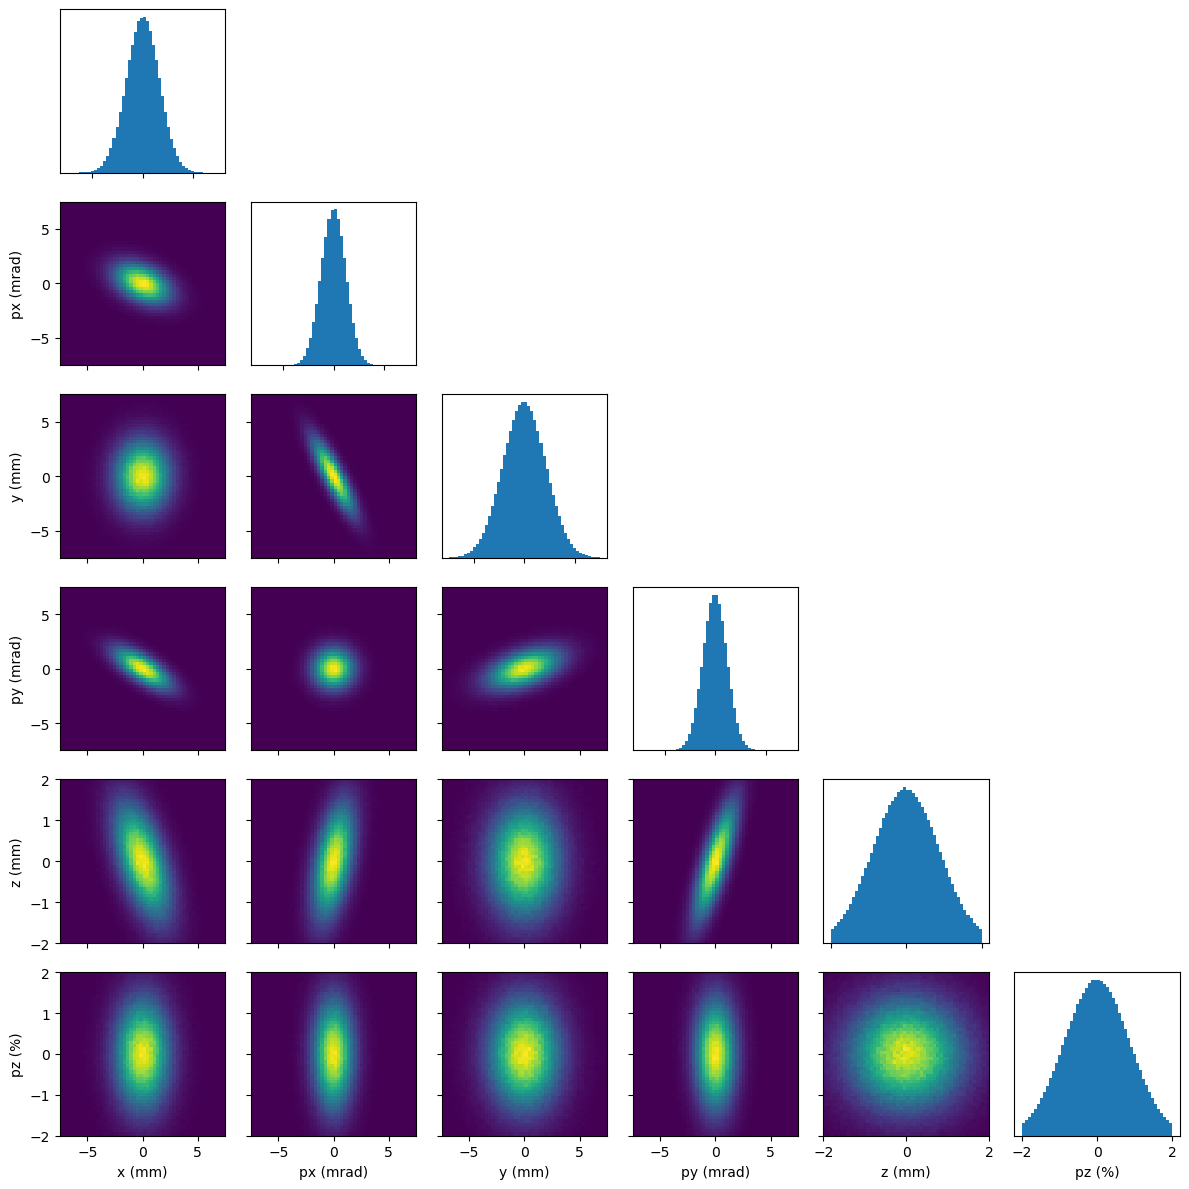

In [3]:
#plot gt beam
import numpy as np
lims = np.array([[-15, 15],
                 [-15, 15],
                 [-15, 15],
                 [-15, 15],
                 [-4, 4],
                 [-40, 40]]) * 1e-3 * 0.5
fig, ax = plot_projections(
    gaussian_beam.numpy_particles(),
    custom_lims = lims,
    background = 0
)

## generate gaussian beam distribution (z-pz correlation)

In [4]:
# create synthetic ground truth beam from base and transform yaml files
gaussian_beam_w_E_corr = create_beam(
    base_yaml = os.path.join(yaml_dir, 'gaussian.yaml'),
    transforms_yaml = os.path.join(yaml_dir, 'transforms-linear.yaml'), 
    p0c = p0c,
    n_particle = n_part,
)
torch.save(gaussian_beam_w_E_corr, "data/gaussian_beam_w_E_corr.pt")

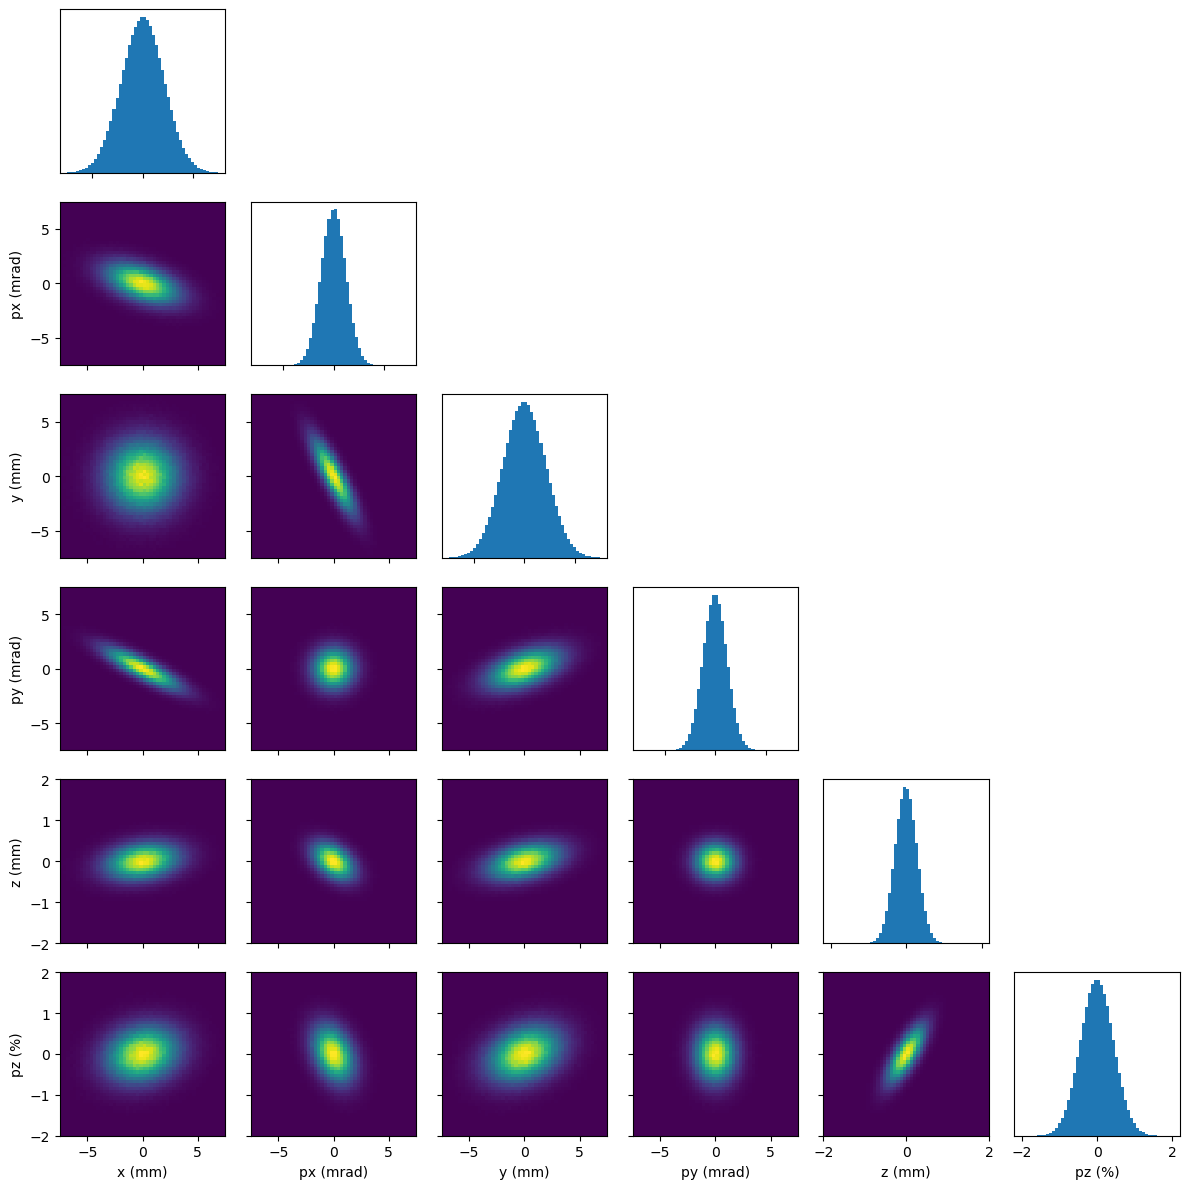

In [5]:
#plot gt beam
fig, ax = plot_projections(
    gaussian_beam_w_E_corr.numpy_particles(),
    custom_lims = lims,
    background = 0
)

## generate nonlinear beam distribution

In [6]:
# create synthetic ground truth beam from base and transform yaml files
nonlinear_beam = create_beam(
    base_yaml = os.path.join(yaml_dir, 'base.yaml'),
    transforms_yaml = os.path.join(yaml_dir, 'transforms-nonlinear.yaml'), 
    p0c = p0c,
    n_particle = n_part,
)

data = nonlinear_beam.data.clone()
nonlinear_beam.data = data * 0.5

torch.save(nonlinear_beam, "data/nonlinear_beam.pt")

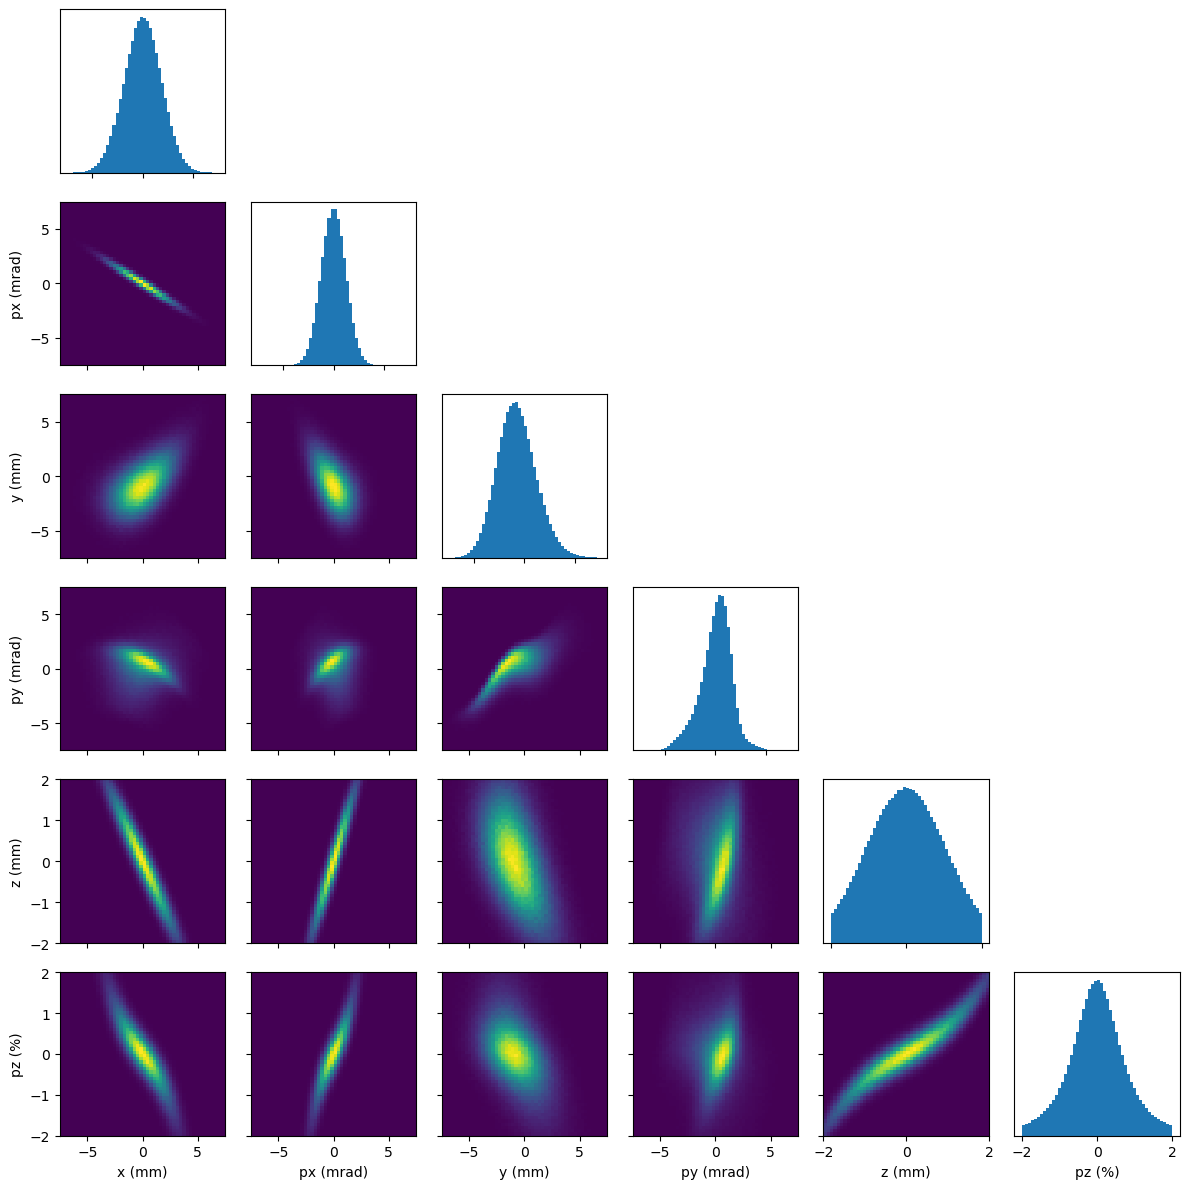

In [7]:
#plot gt beam
fig, ax = plot_projections(
    nonlinear_beam.numpy_particles(),
    custom_lims = lims,
    background = 0
)